**THE SPARKS FOUNDATION #GRIPJUNE21**

**Author: KROSURU PRUDHVI RAJ, DATA SCIENCE & BUSINESS ANALYTICS INTERN**

**Task-8 Timeline Analysis : Covid-19
(Level - Advanced)**

**Objective: Create a storyboard showing spread of Covid-19 cases in your country or 
any region (Asia, Europe, BRICS etc) using Tableau, Power BI or SAP**

**Dataset: https://bit.ly/30d2gdi**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

**Importing Data**

In [4]:
df = pd.read_csv("/content/owid-covid-data.csv")

In [5]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,0.026,0.000,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,0.026,0.000,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,0.051,0.026,0.004,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.78,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,0.103,0.051,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,1.861500e+04,18616.00000,18429.000000,17213.000000,17237.000000,18429.000000,18615.000000,18615.000000,18428.000000,17212.000000,17236.000000,18428.000000,15770.000000,2247.000000,2247.000000,1938.000000,1938.000000,0.0,0.0,71.000000,71.000000,6.182000e+03,6.358000e+03,6358.000000,6182.00000,7689.000000,7689.000000,7261.000000,7221.000000,3.394000e+03,3.290000e+03,2.716000e+03,2.803000e+03,6.061000e+03,3394.000000,3290.000000,2716.000000,6061.000000,16658.000000,1.945500e+04,18202.000000,17221.000000,17221.000000,17221.000000,17626.000000,10025.000000,17808.000000,18202.000000,12612.000000,12612.000000,9110.000000,16112.000000,18373.000000,17613.000000,471.000000
mean,9.153699e+05,5320.57037,5321.748022,19625.358508,108.400128,100.374657,14517.225985,75.115118,75.365604,317.046360,1.547253,1.438984,0.973912,318.356030,24.869916,1977.120743,189.309520,NaN,NaN,1072.852338,92.570141,2.739936e+04,4.341174e+06,392.104967,2.57924,24846.645858,2.441477,0.109066,348.947043,4.877996e+07,2.585035e+07,1.116783e+07,9.974054e+05,4.551658e+05,27.648589,18.663793,11.273185,3255.530935,56.273885,1.893373e+08,203.274751,30.318588,8.420997,5.399181,18141.813465,13.002953,255.238362,7.853608,10.497494,31.890200,48.196485,3.024861,72.954118,0.721610,16.898960
std,4.598775e+06,27547.25011,27351.737990,78689.305252,443.706868,416.386118,26959.349866,174.169969,146.625545,536.667917,4.073288,3.015559,0.341500,331.094437,28.507200,2022.947093,271.379536,NaN,NaN,1057.264715,91.225139,7.101866e+04,8.318999e+06,791.545543,7.66576,53932.400865,5.719137,0.114008,1397.114979,2.504253e+08,1.368728e+08,5.340905e+07,4.218482e+06,2.810769e+06,33.173946,20.299844,15.412173,5176.545047,21.808320,7.913217e+08,398.091418,8.759672,5.757974,3.918552,17414.465732,20.328622,118.977934,3.798705,10.801033,12.083441,35.094737,2.410237,8.023590,0.154652,30.694896
min,1.000000e+00,-209.00000,-29.143000,1.000000,-117.000000,-14.429000,0.001000,-17.240000,-2.404000,0.001000,-10.095000,-1.245000,0.000000,0.000000,0.000000,4.000000,0.106000,NaN,NaN,70.408000,6.075000,-5.600000e+01,0.000000e+00,0.000000,-0.01700,0.000000,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.500200e+04,3.202000,16.700000,2.372000,1.337000,661.240000,0.200000,105.599000,0.990000,0.300000,12.300000,2.735000,0.400000,53.280000,0.397000,-25.150000
25%,1.199000e+03,1.00000,7.857000,51.000000,0.000000,0.000000,306.224000,0.122000,1.442750,8.252000,0.000000,0.000000,0.810000,45.000000,3.106000,385.250000,29.099500,NaN,NaN,228.323500,19.700500,2.135500e+03,2.574432e+05,27.009250,0.32225,2010.000000,0.408000,0.022000,6.100000,1.275542e+05,8.522650e+04,7.226875e+04,5.443500e+03,5.790000e+02,2.942500,2.410000,1.167500,366.000000,40.740000,1.701583e+06,17.348000,25.000000,3.655000,2.242000,3645.070000,0.

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19456 entries, 0 to 19455
Data columns (total 60 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               19456 non-null  object 
 1   continent                              18374 non-null  object 
 2   location                               19456 non-null  object 
 3   date                                   19456 non-null  object 
 4   total_cases                            18615 non-null  float64
 5   new_cases                              18616 non-null  float64
 6   new_cases_smoothed                     18429 non-null  float64
 7   total_deaths                           17213 non-null  float64
 8   new_deaths                             17237 non-null  float64
 9   new_deaths_smoothed                    18429 non-null  float64
 10  total_cases_per_million                18615 non-null  float64
 11  ne

In [8]:
df.shape

(19456, 60)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 60)


In [10]:
df.count()

iso_code                                 19456
continent                                18374
location                                 19456
date                                     19456
total_cases                              18615
new_cases                                18616
new_cases_smoothed                       18429
total_deaths                             17213
new_deaths                               17237
new_deaths_smoothed                      18429
total_cases_per_million                  18615
new_cases_per_million                    18615
new_cases_smoothed_per_million           18428
total_deaths_per_million                 17212
new_deaths_per_million                   17236
new_deaths_smoothed_per_million          18428
reproduction_rate                        15770
icu_patients                              2247
icu_patients_per_million                  2247
hosp_patients                             1938
hosp_patients_per_million                 1938
weekly_icu_ad

**Checking the Missing or Null values**

In [11]:
print(df.isnull().sum())

iso_code                                     0
continent                                 1082
location                                     0
date                                         0
total_cases                                841
new_cases                                  840
new_cases_smoothed                        1027
total_deaths                              2243
new_deaths                                2219
new_deaths_smoothed                       1027
total_cases_per_million                    841
new_cases_per_million                      841
new_cases_smoothed_per_million            1028
total_deaths_per_million                  2244
new_deaths_per_million                    2220
new_deaths_smoothed_per_million           1028
reproduction_rate                         3686
icu_patients                             17209
icu_patients_per_million                 17209
hosp_patients                            17518
hosp_patients_per_million                17518
weekly_icu_ad

In [12]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,1.0,1.0,NaN,NaN,NaN
1,2020-02-25,1.0,0.0,NaN,NaN,NaN
2,2020-02-26,1.0,0.0,NaN,NaN,NaN
3,2020-02-27,1.0,0.0,NaN,NaN,NaN
4,2020-02-28,1.0,0.0,NaN,NaN,NaN


In [13]:
df1.date = pd.to_datetime(df.date)
df1.set_index('date', inplace = True)
df1.head()
df1.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2020-09-14,436433.0,1685.0,12013.0,32577.0,2852683.0
2020-09-15,437983.0,1550.0,12040.0,27197.0,2879880.0
2020-09-16,439287.0,1304.0,12058.0,23102.0,2902982.0
2020-09-17,441150.0,1863.0,12142.0,31646.0,2934628.0
2020-09-18,442827.0,1677.0,12199.0,NaN,NaN


Text(0.5, 0, 'Month')

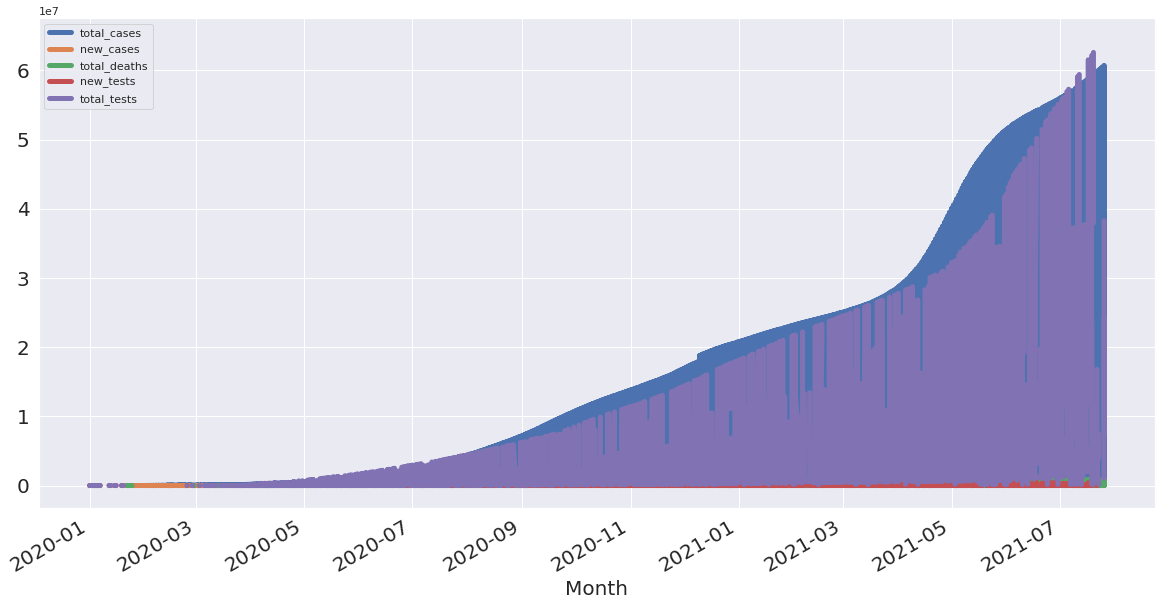

In [14]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

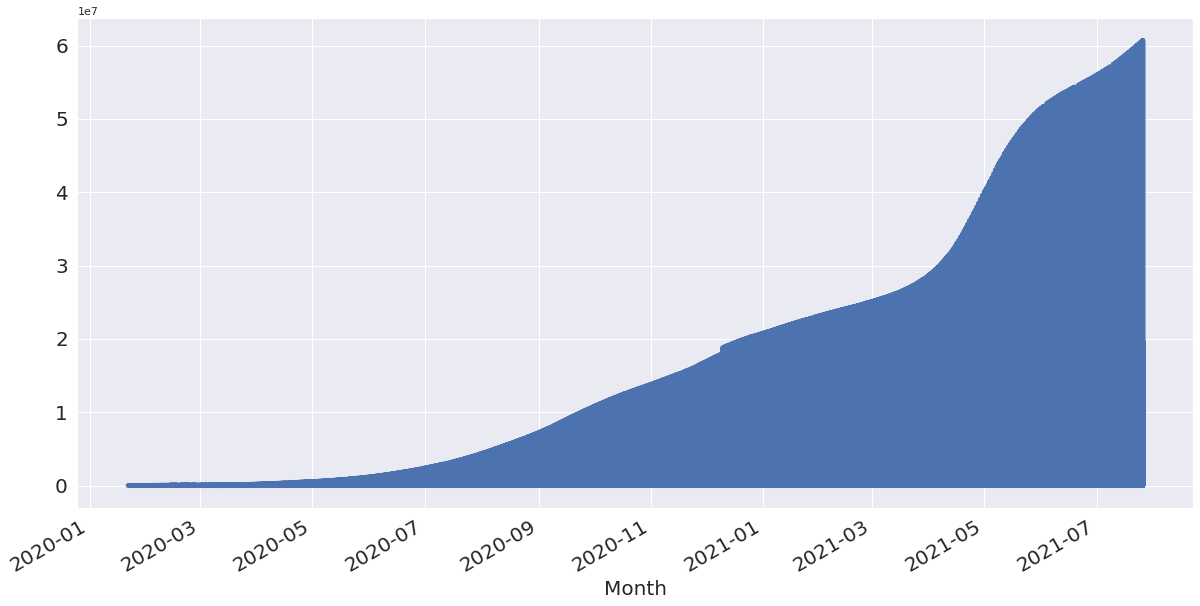

In [15]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

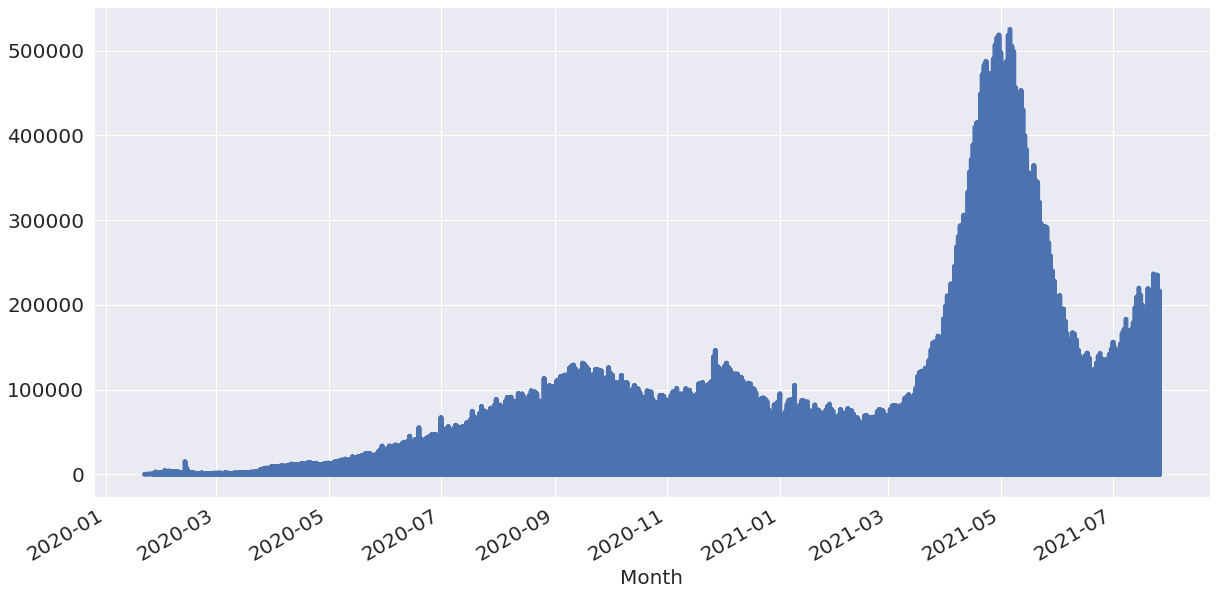

In [16]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

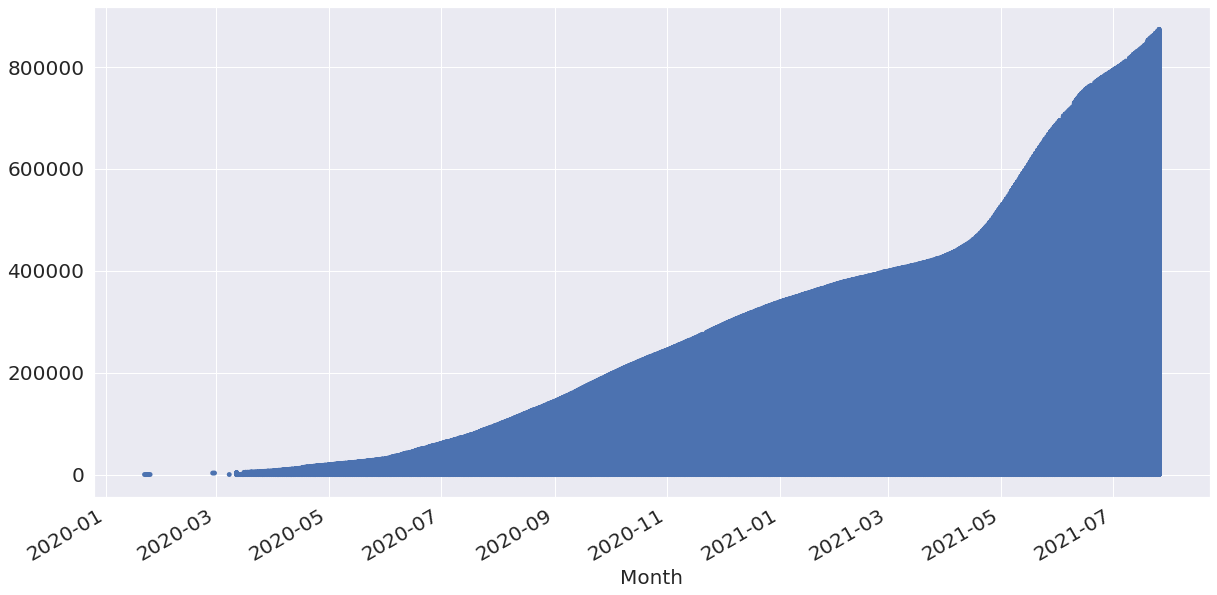

In [17]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

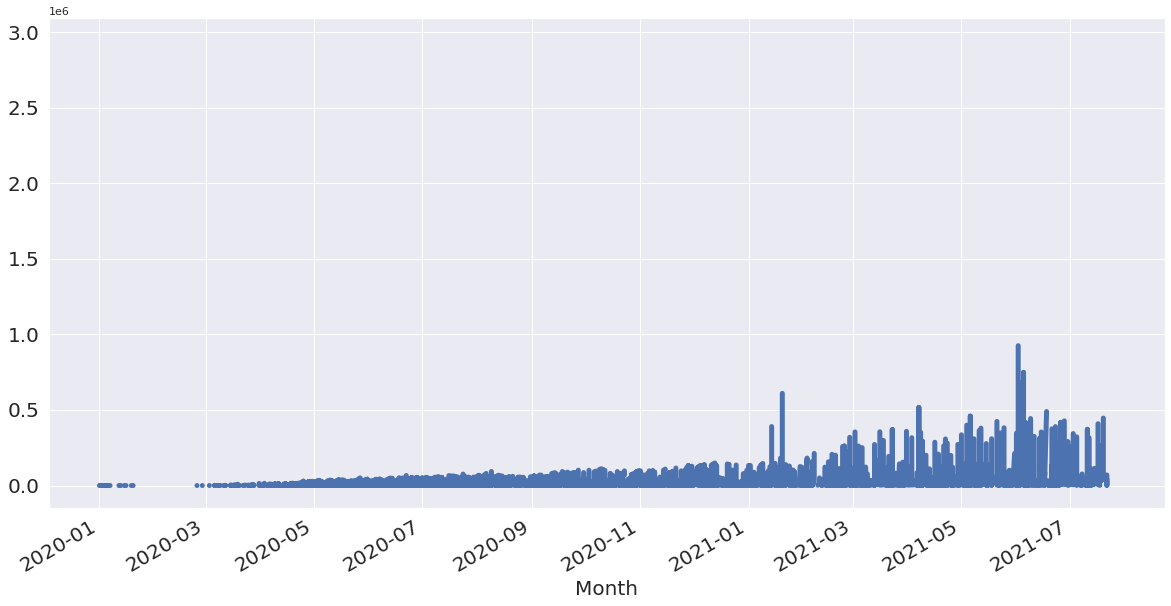

In [18]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

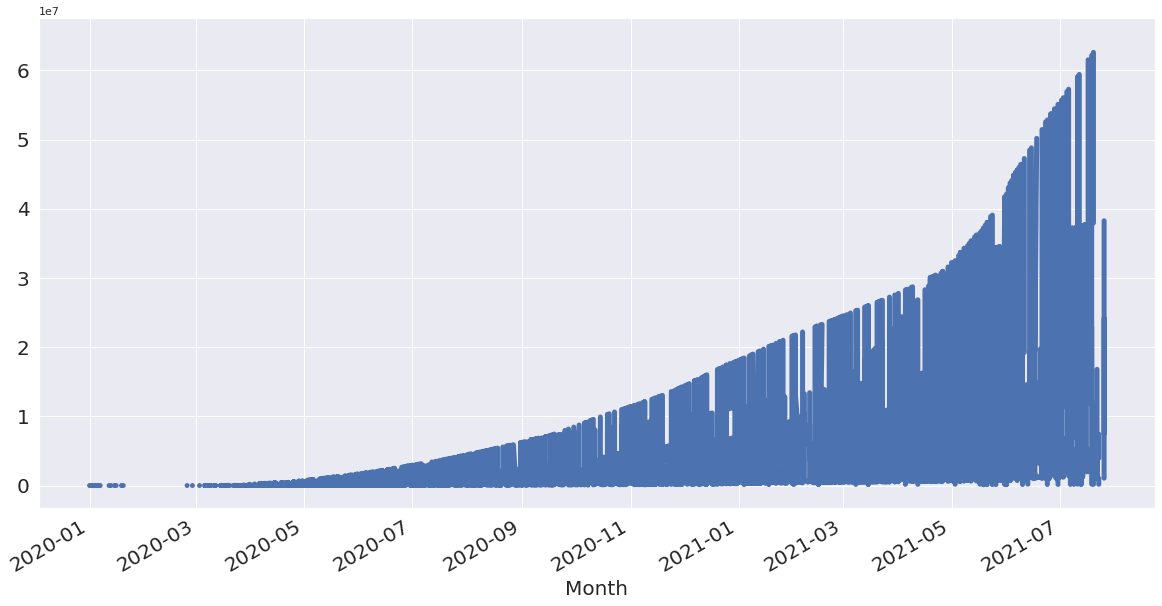

In [19]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

**Trends and Seasonality in TimeSeries Data**

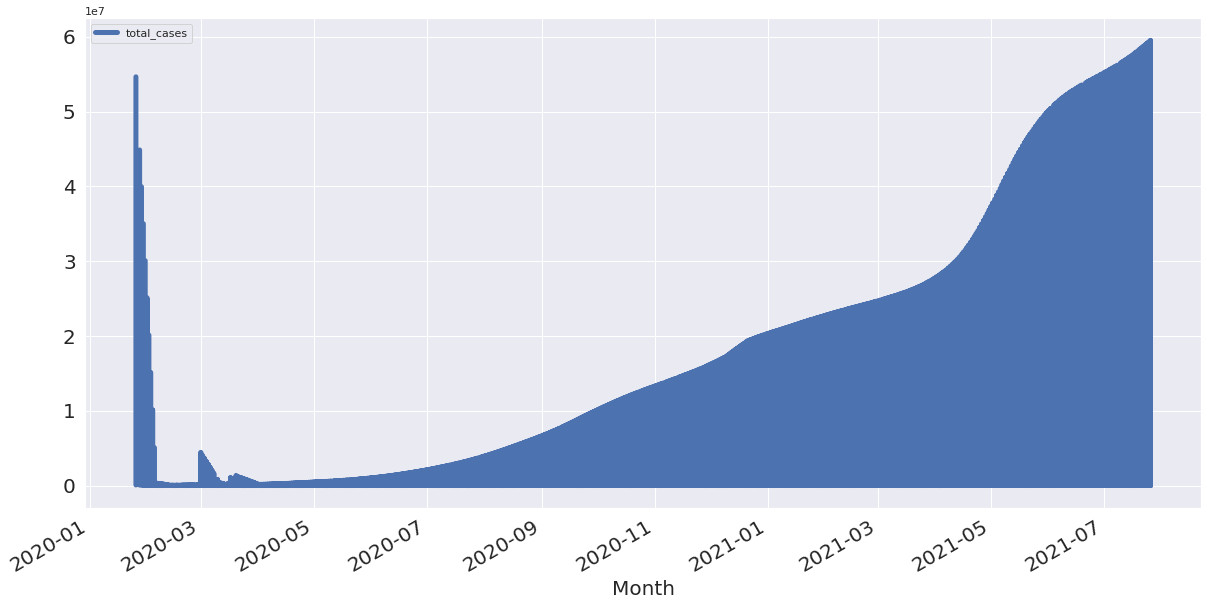

In [20]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

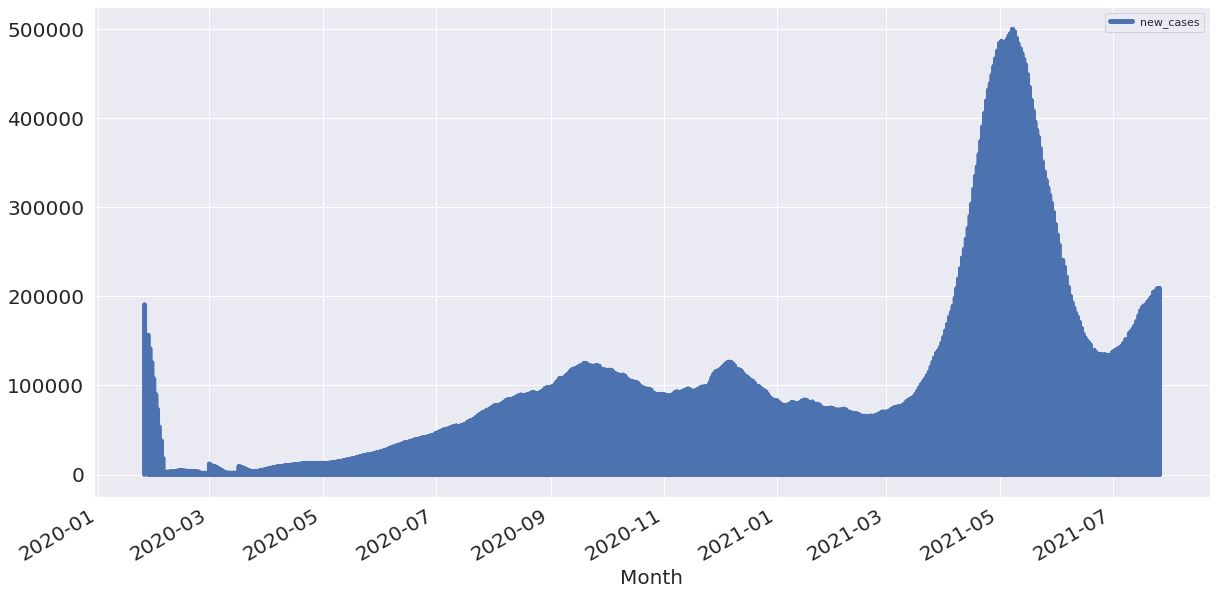

In [21]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

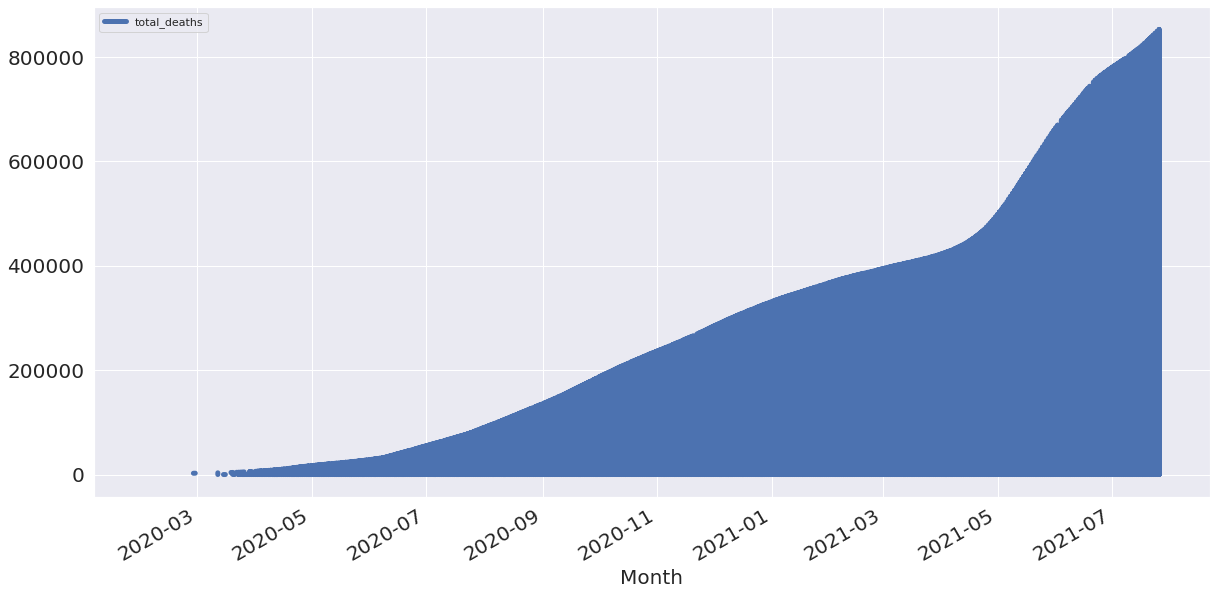

In [22]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

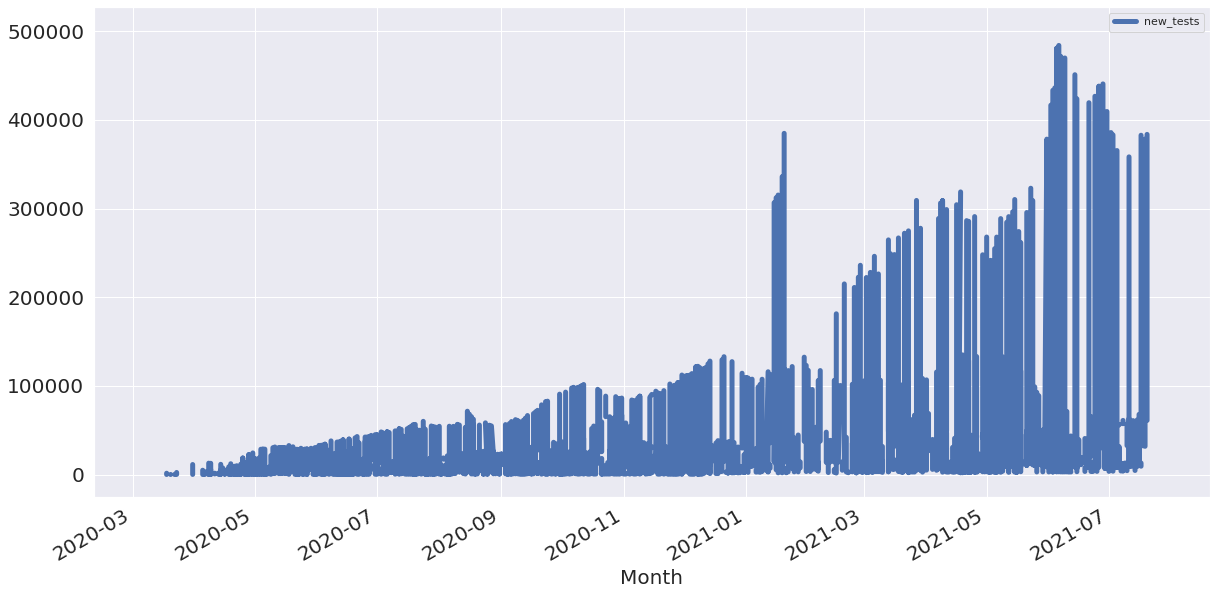

In [23]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

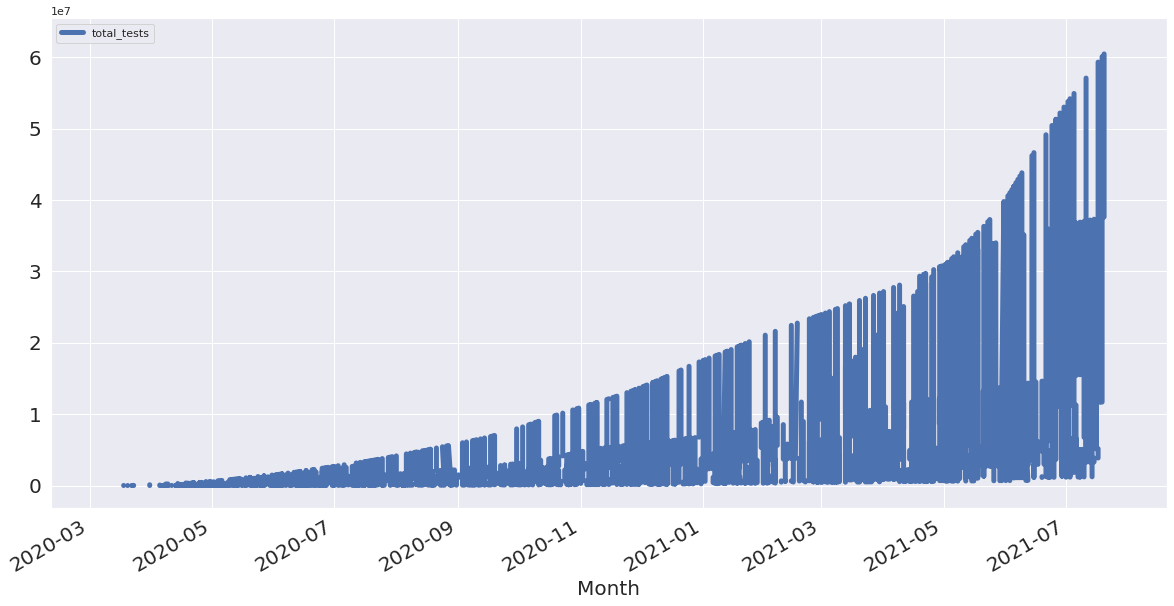

In [24]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

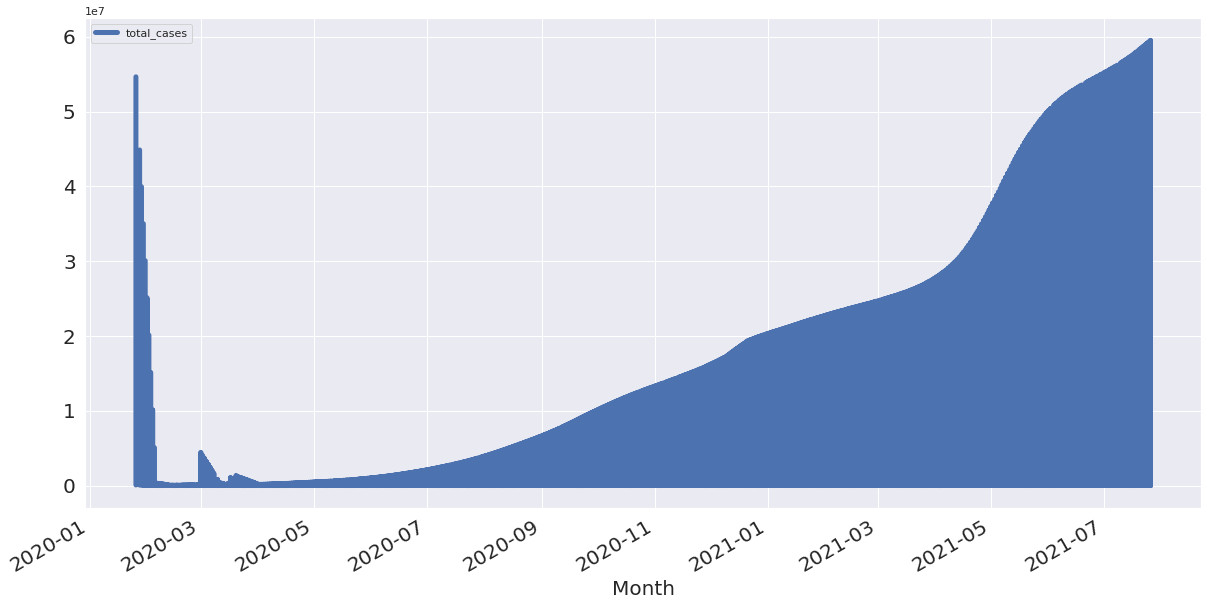

In [25]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);